In [ ]:
!pip3 install visualkeras

ERROR: Operation cancelled by user


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Add, Multiply
from keras.layers import ELU, PReLU, LeakyReLU
from keras.models import Model
from keras.utils.vis_utils import plot_model
from tensorflow.keras import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras import metrics
from sklearn.metrics import r2_score


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import math as m
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
edgecolors=None



In [74]:


!wget -O humoments.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humoments.csv
!wget -O classicgeometry.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometry.csv
!wget -O colors.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/colors.csv
!wget -O alldata.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/alldata.csv


!wget -O allfeaturesRaspberriesRaw.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesRaspberriesRaw.csv
!wget -O allfeaturesStrawberriesRaw.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesStrawberriesRaw.csv
!wget -O allfeaturesYOLORasp.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesYOLORasp.csv
!wget -O allfeaturesDetectron2rasp.csv https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/allfeaturesDetectron2rasp.csv



%mkdir figures


--2023-04-26 20:02:19--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/humoments.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108985 (106K) [text/plain]
Saving to: ‘humoments.csv’

humoments.csv       100%[===================>] 106.43K  --.-KB/s    in 0.02s   

2023-04-26 20:02:19 (5.17 MB/s) - ‘humoments.csv’ saved [108985/108985]

--2023-04-26 20:02:19--  https://raw.githubusercontent.com/pcruiher08/ImageFeatures/main/classicgeometry.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19904 (19K) [text/p

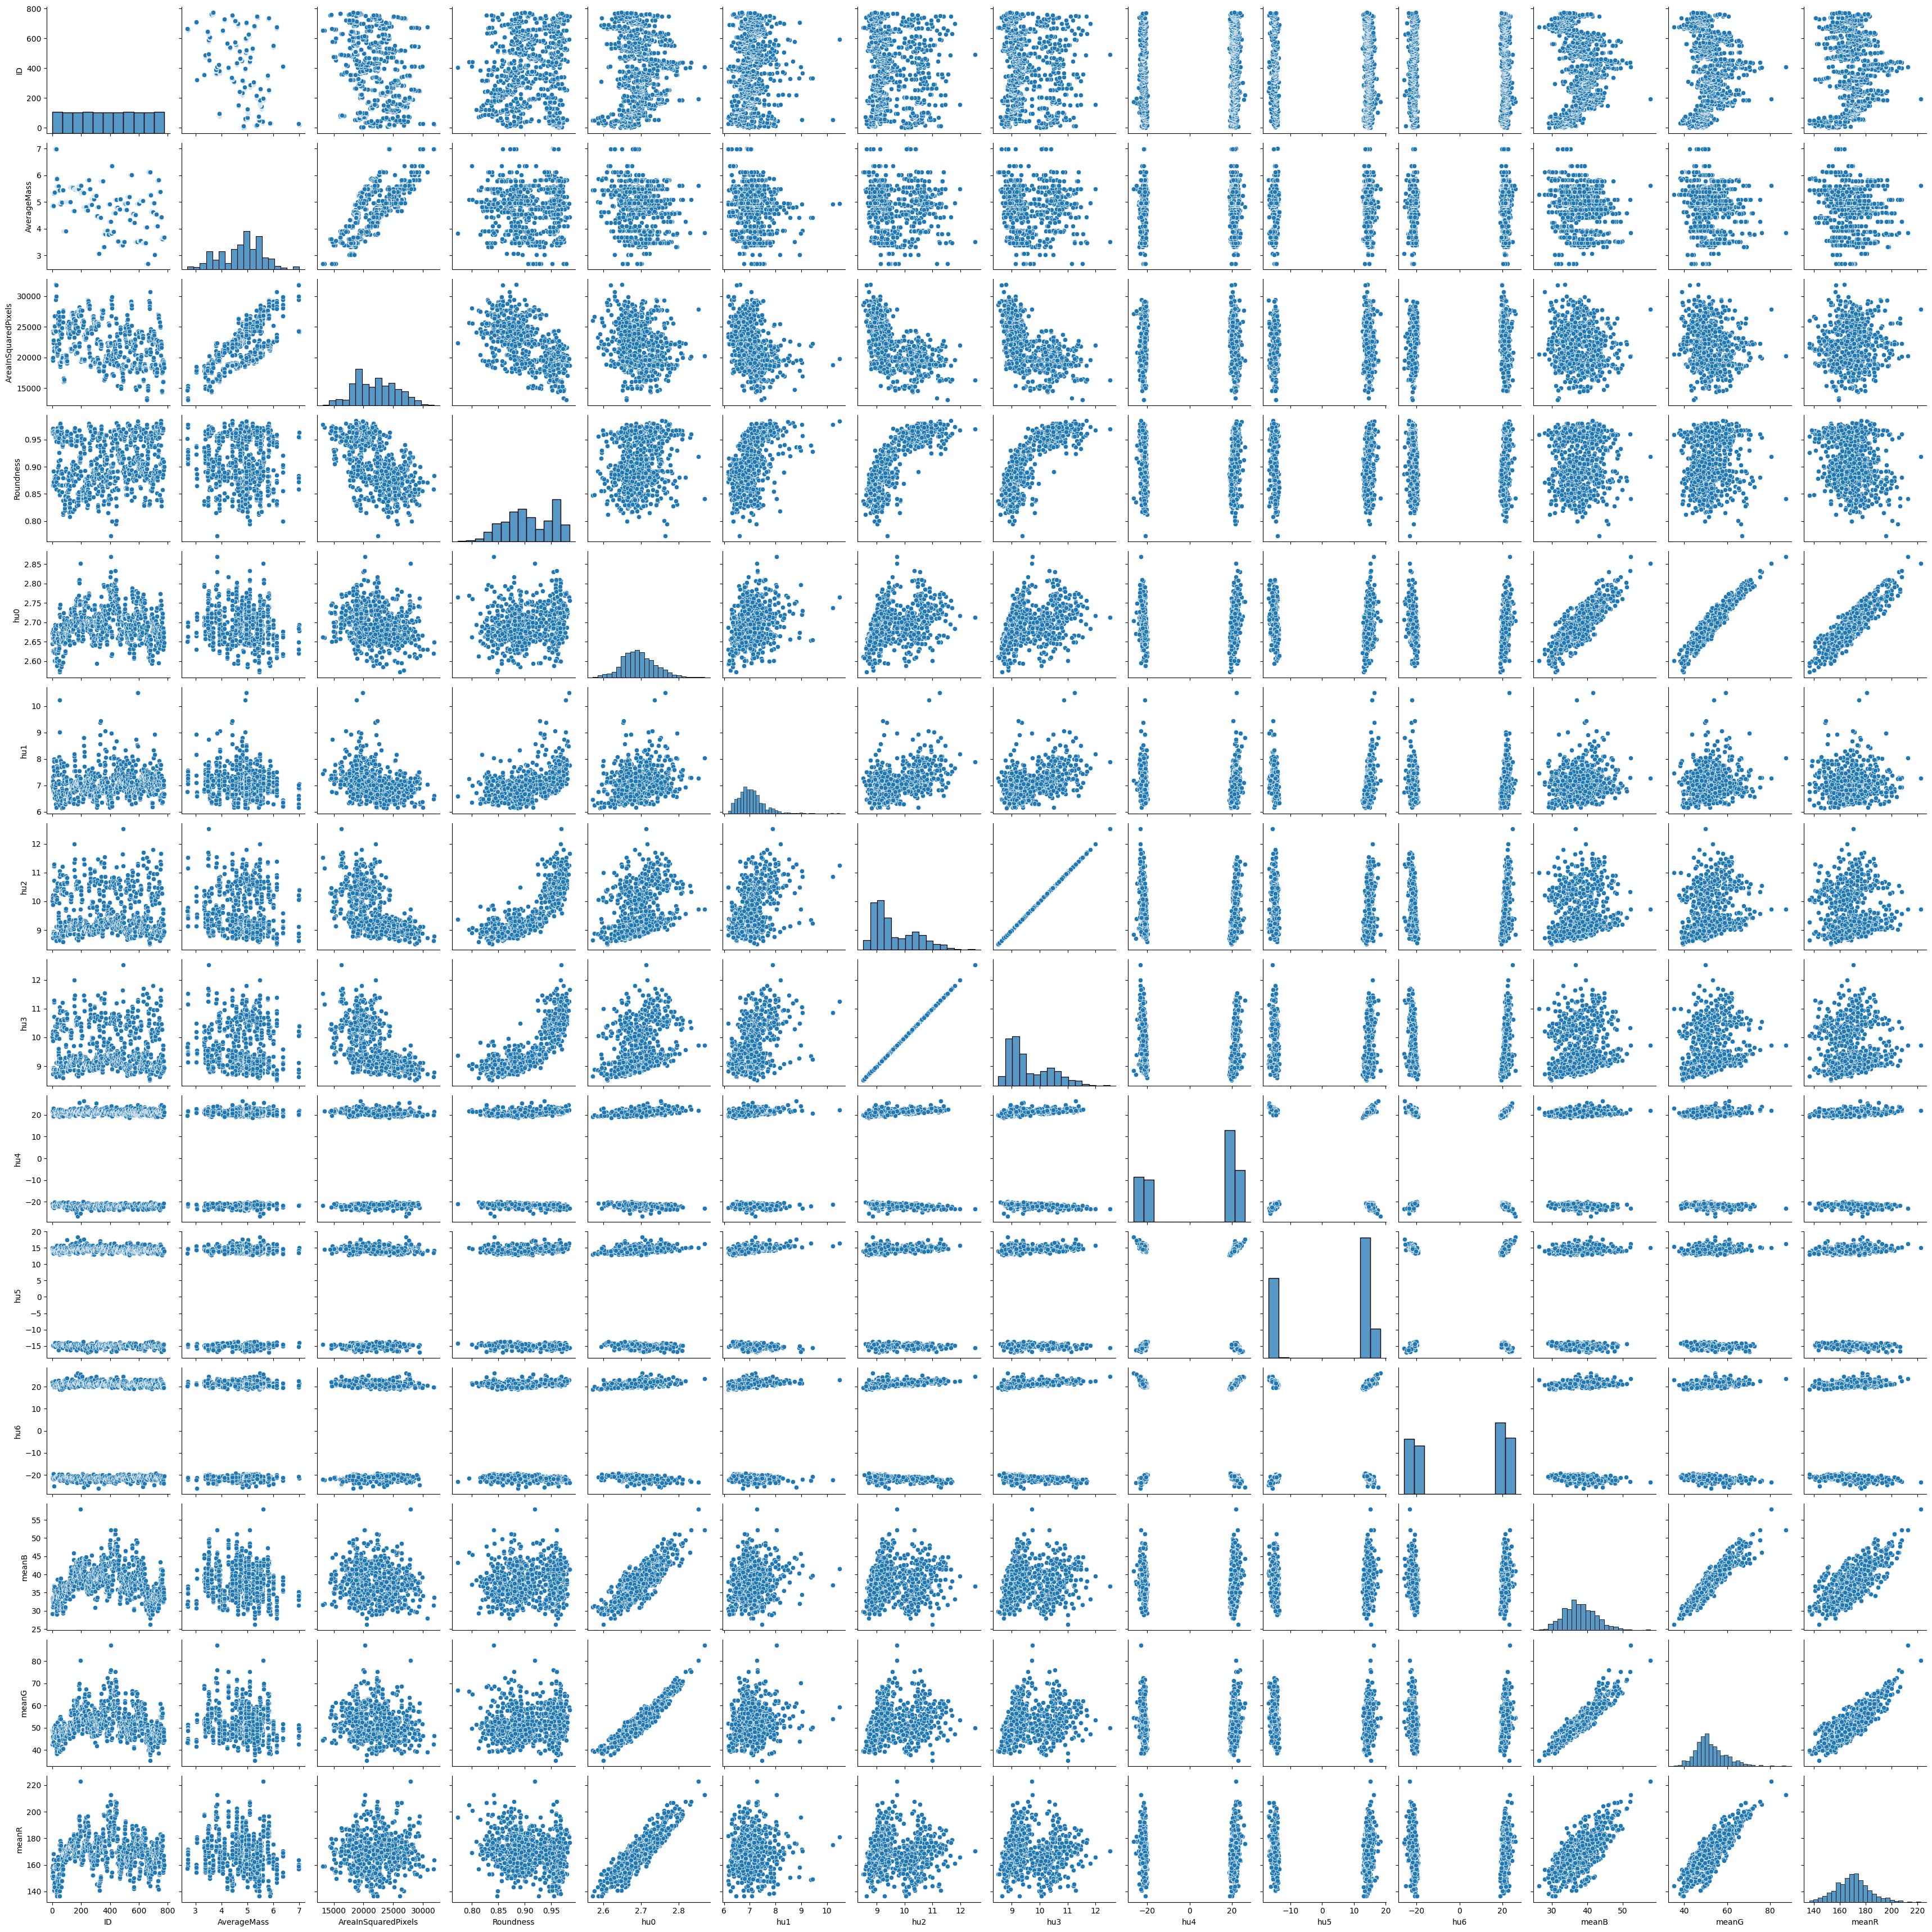

In [ ]:
testdf = pd.read_csv("allfeaturesRaspberriesRaw.csv")

sns.pairplot(testdf)


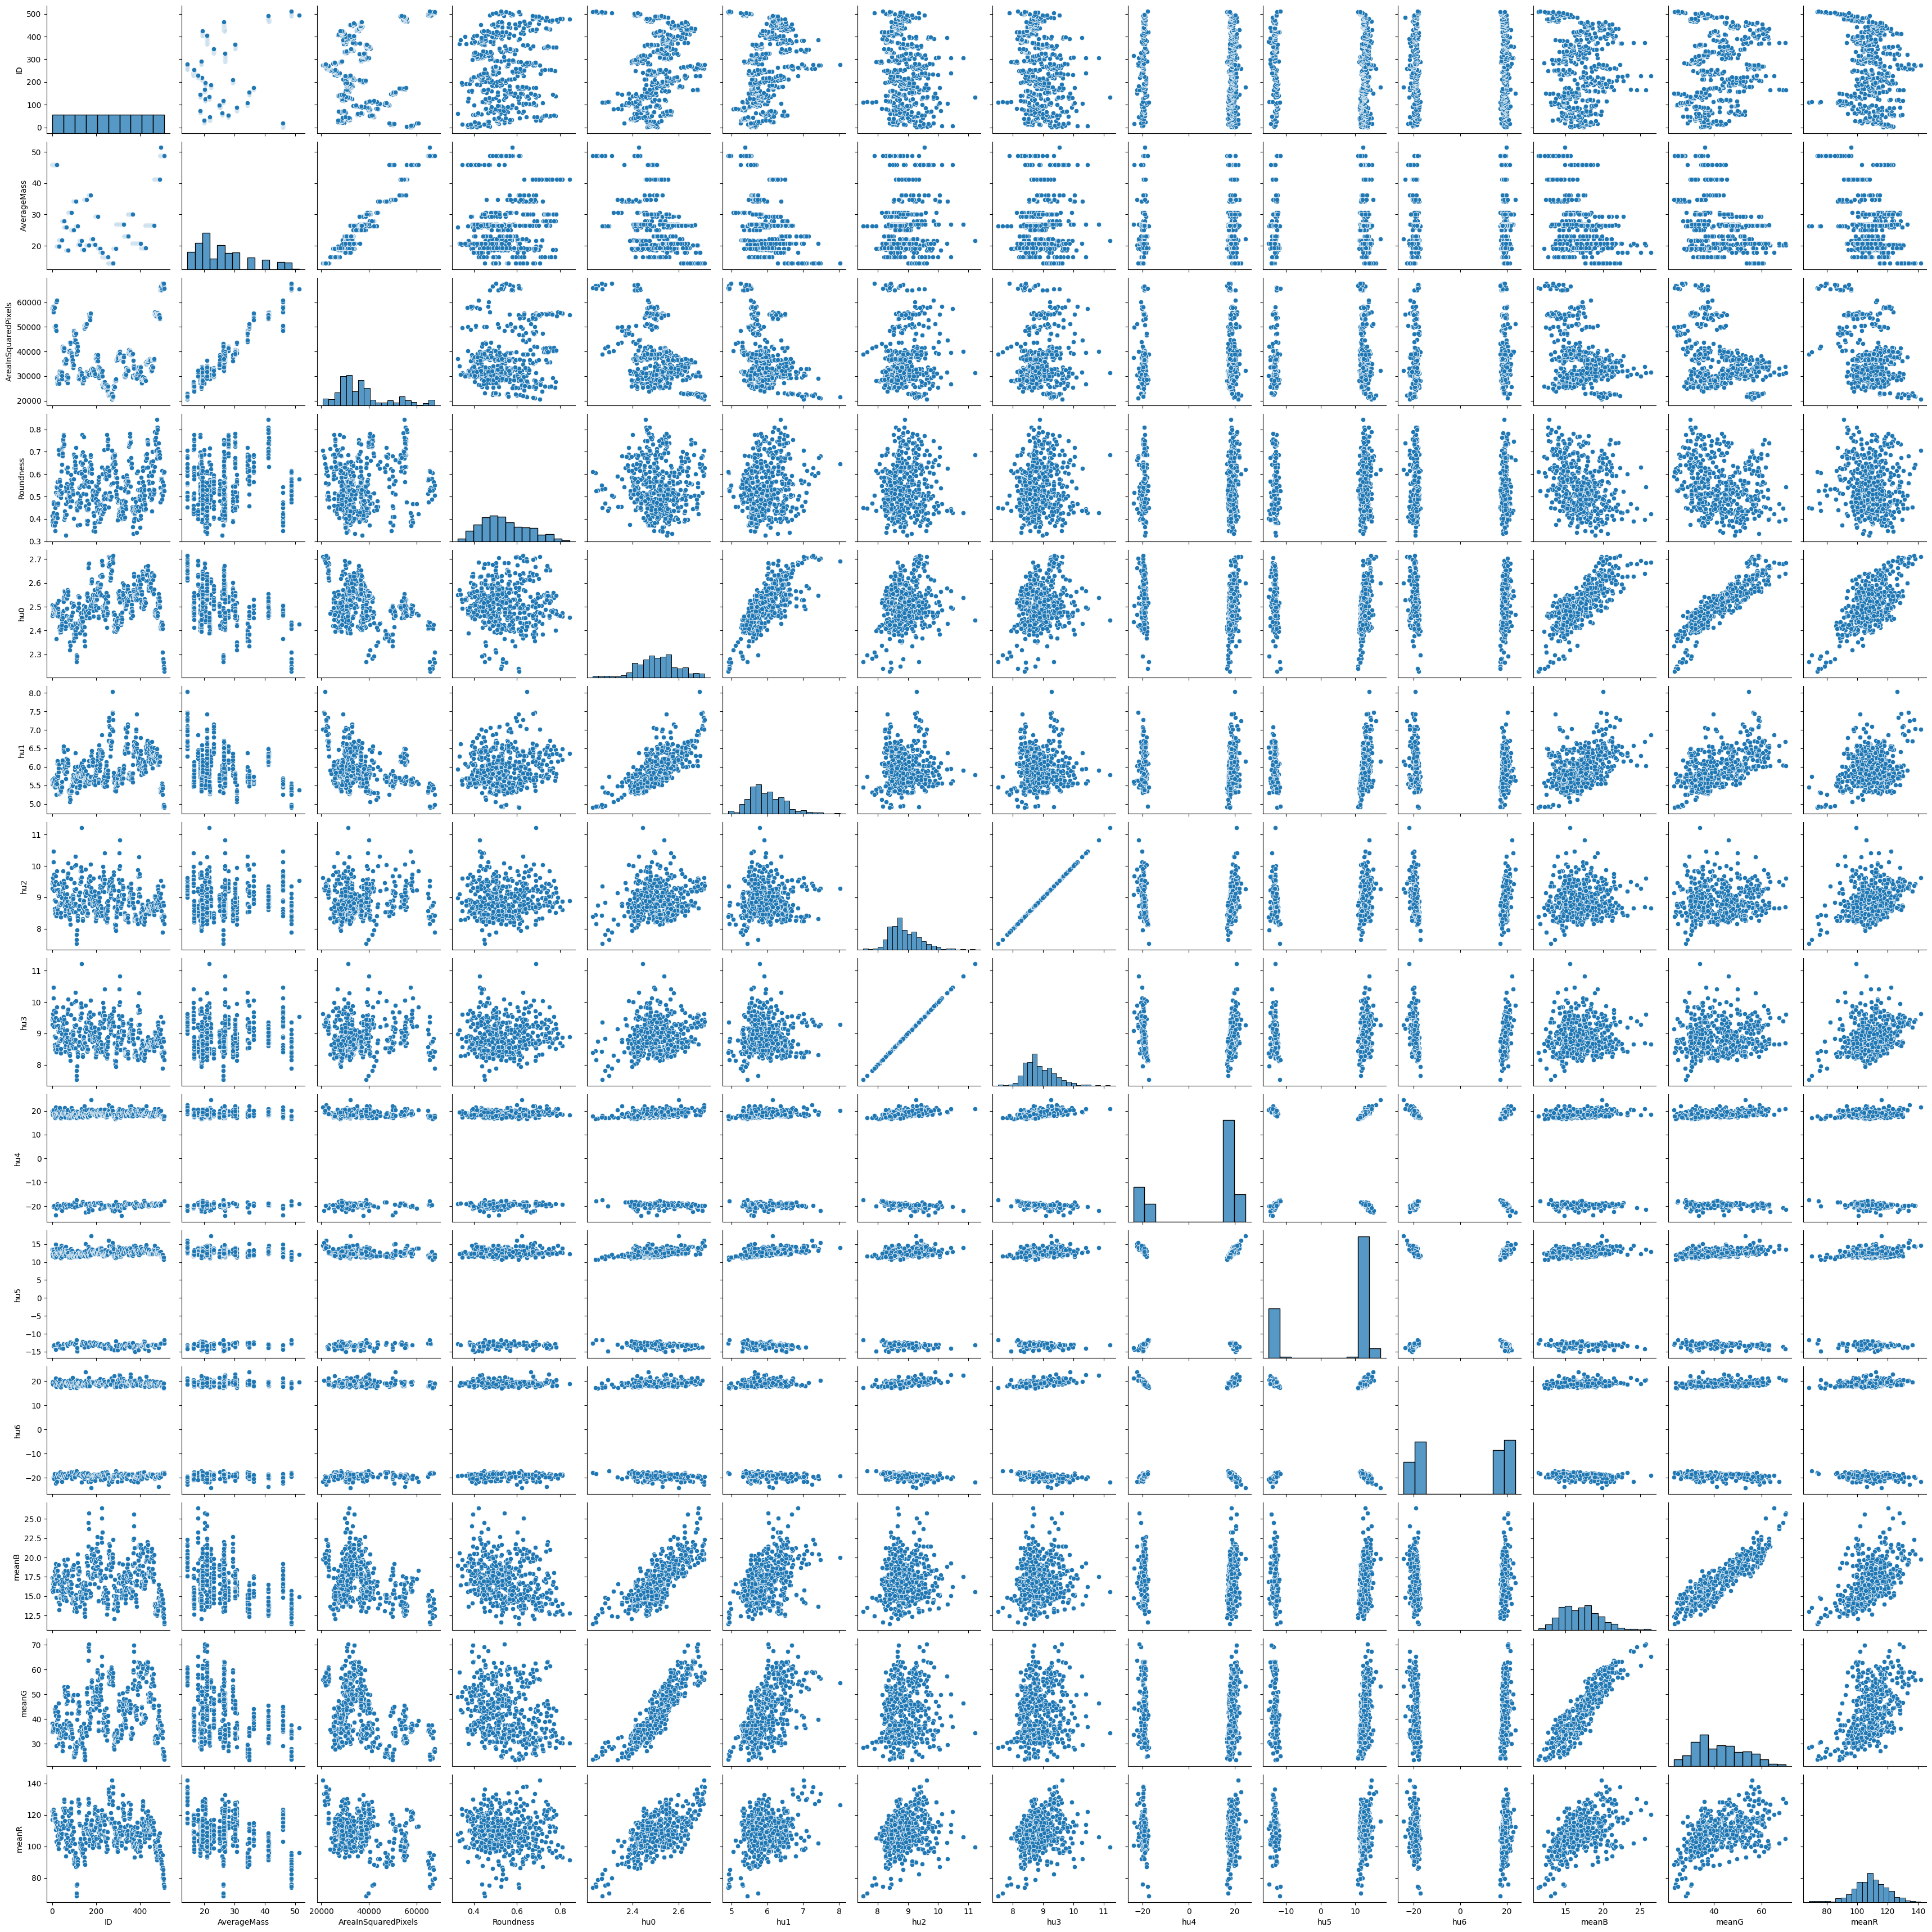

In [ ]:
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")

sns.pairplot(testdf)


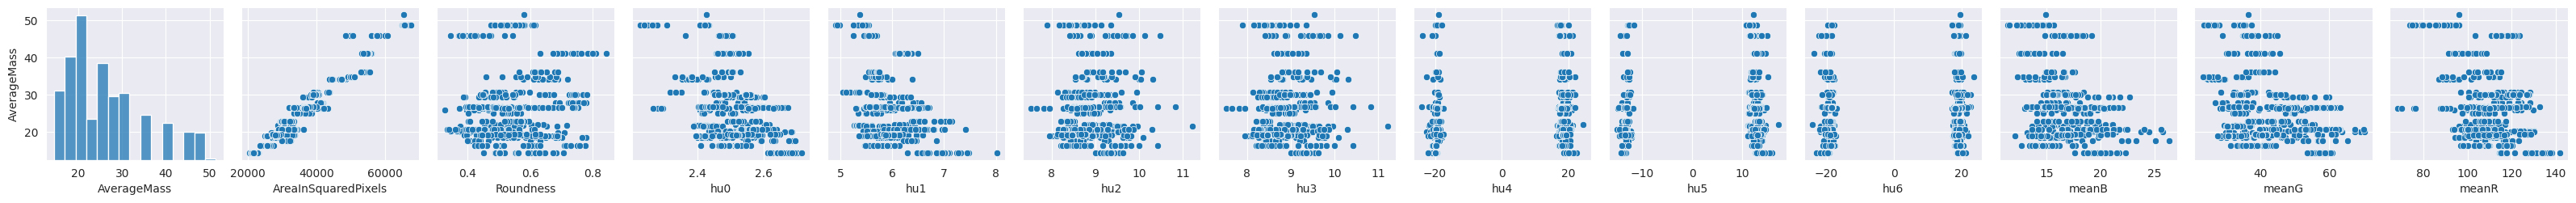

In [ ]:
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")

testdf = testdf.drop(['ID'], axis=1)

pp = sns.pairplot(data=testdf,
                  y_vars=['AverageMass'])

plt.savefig("./figures/StrawberriesPairplotAverageMass", dpi=300)




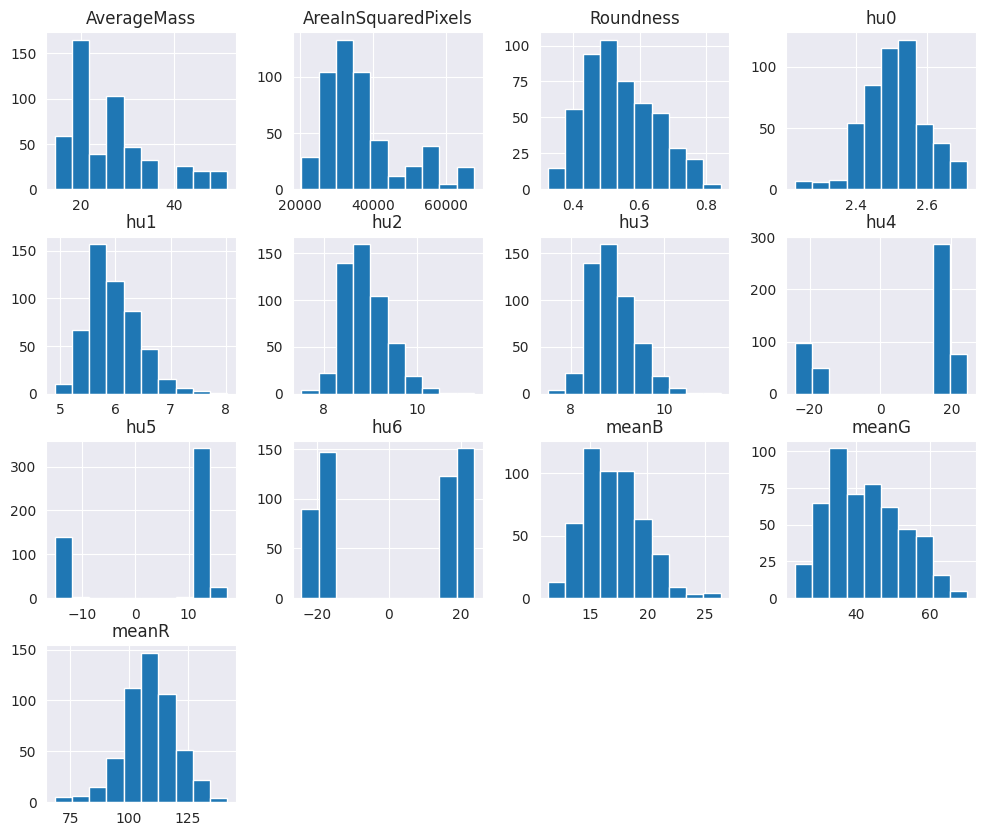

In [ ]:
testdf.hist(figsize = (12,10))
plt.show()

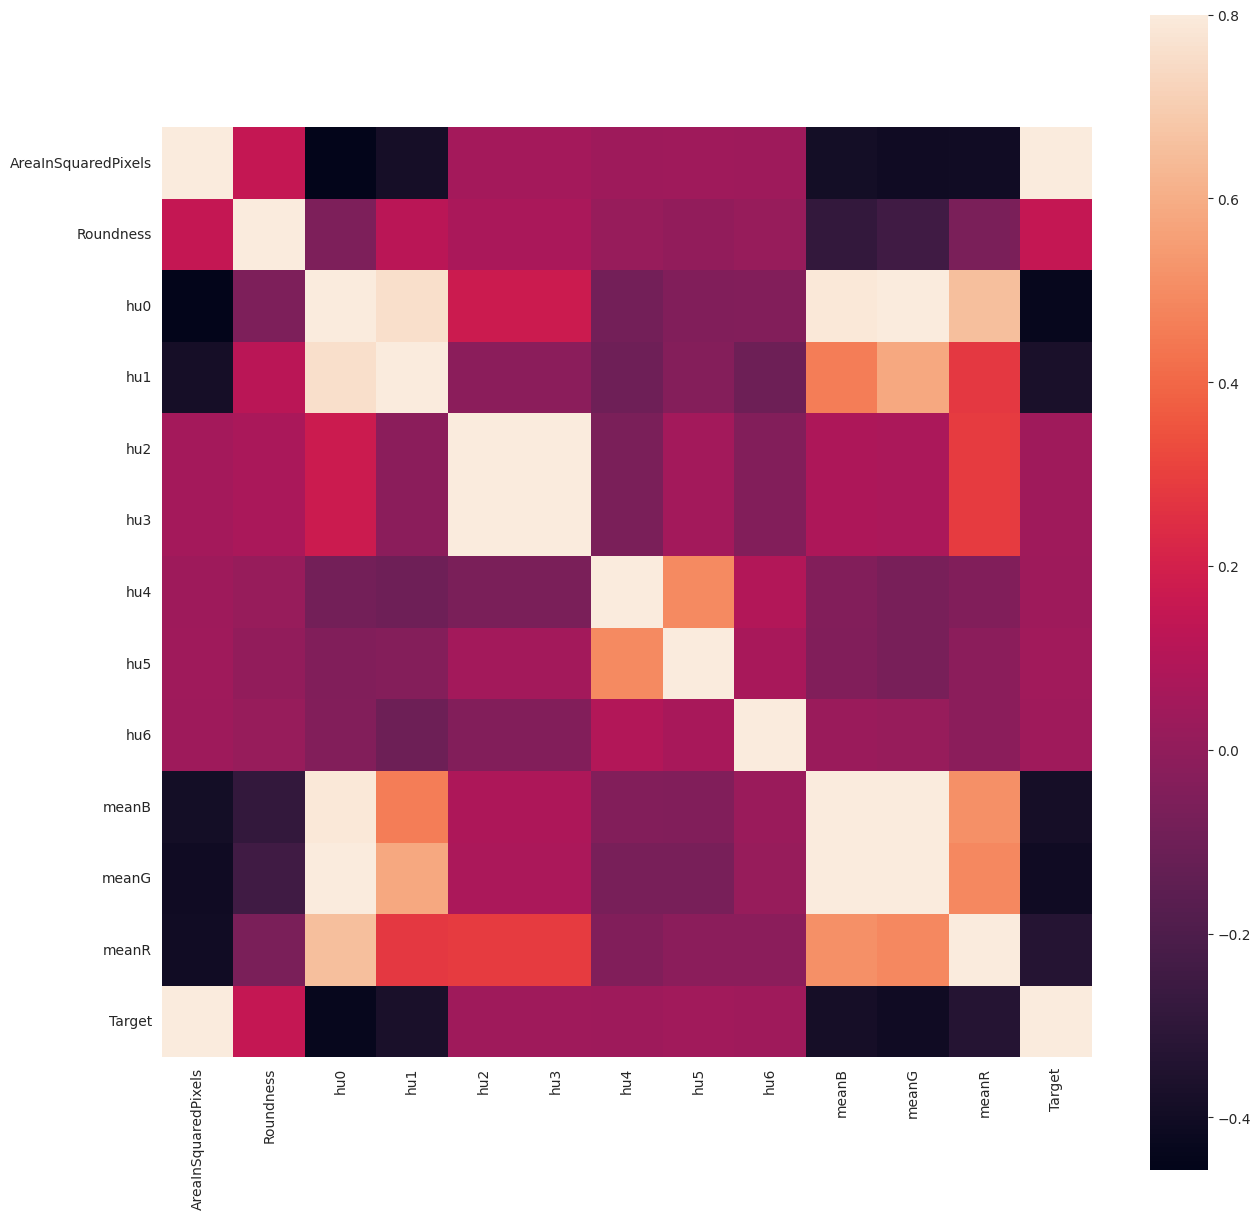

In [ ]:
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")
testdf = testdf.drop(['ID'], axis=1)

testdf['Target'] = testdf['AverageMass']
testdf = testdf.drop(["AverageMass"], axis = 1)
C_mat = testdf.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

<Axes: >

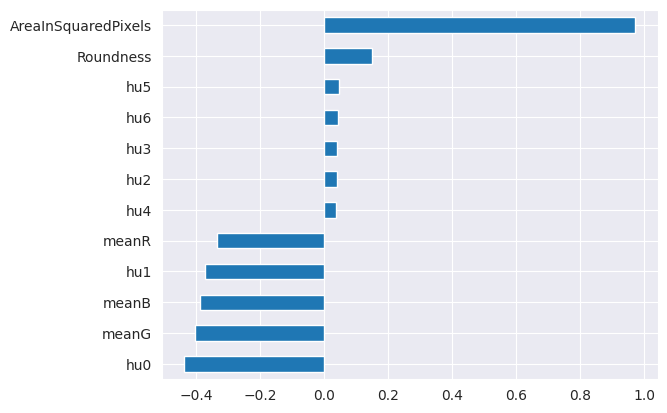

In [72]:
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()

<Axes: >

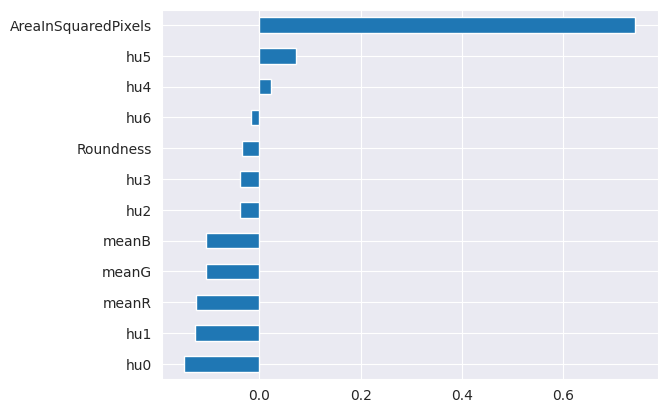

In [73]:
testdf = pd.read_csv("allfeaturesRaspberriesRaw.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()

<Axes: >

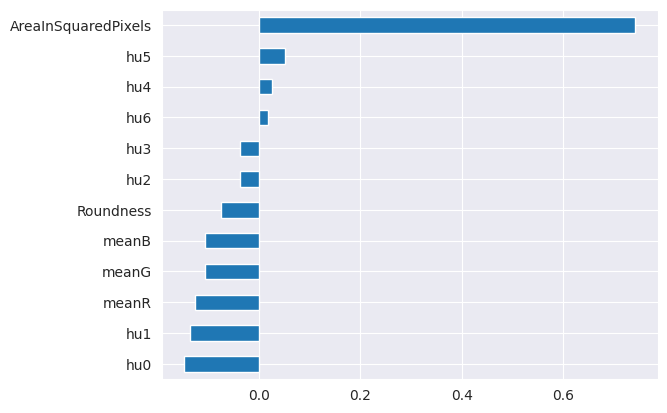

In [76]:
testdf = pd.read_csv("allfeaturesYOLORasp.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()

<Axes: >

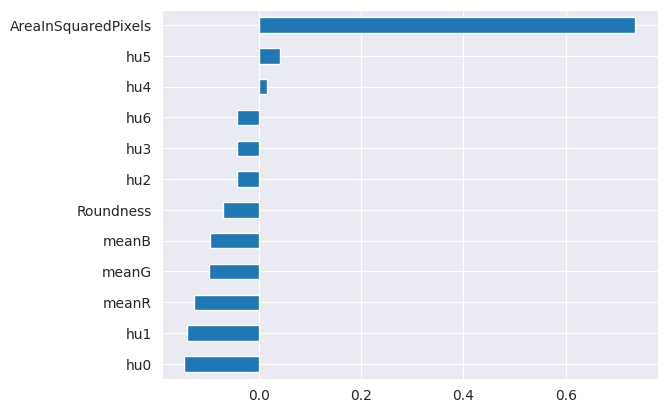

In [77]:
testdf = pd.read_csv("allfeaturesDetectron2rasp.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr()["AverageMass"].sort_values()[:-1].plot.barh()



<Axes: >

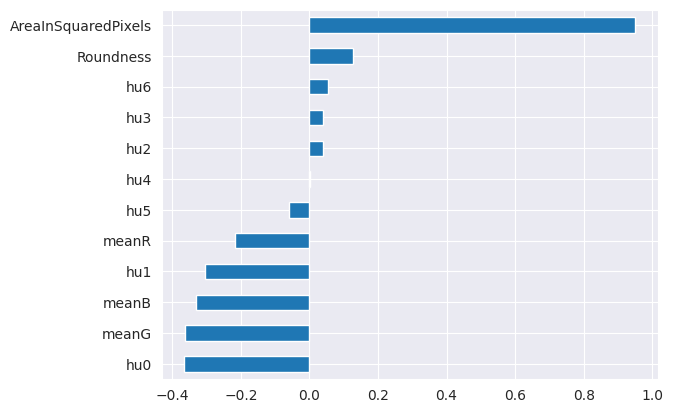

In [80]:
#checando correlacion no lineal con spearman
testdf = pd.read_csv("allfeaturesStrawberriesRaw.csv")
testdf = testdf.drop(['ID'], axis=1)
testdf.corr(method= 'spearman')["AverageMass"].sort_values()[:-1].plot.barh()


In [81]:
testdf.corr().style.background_gradient(cmap='coolwarm')


<Axes: >

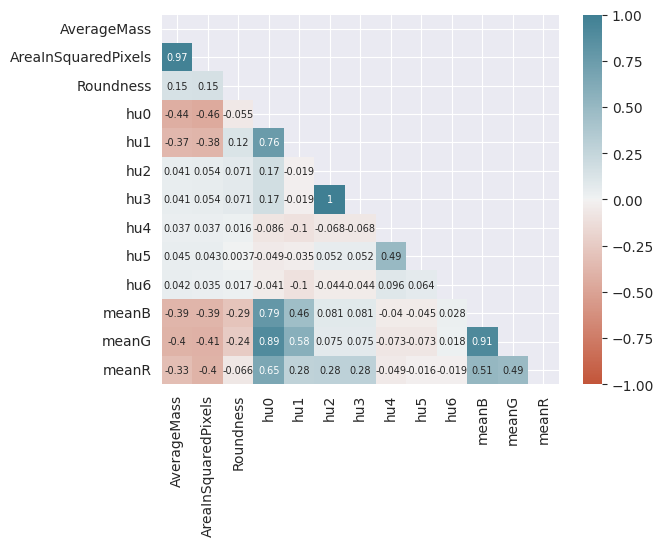

In [82]:

corrmat = testdf.corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

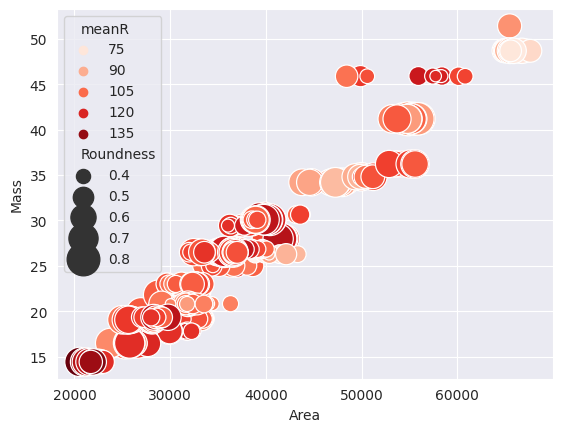

In [ ]:
sns.scatterplot(data = testdf, x=testdf['AreaInSquaredPixels'], y=testdf['AverageMass'],
               size=testdf['Roundness'], hue=testdf['meanR'],
               sizes=(20,600),
               palette='Reds')

plt.xlabel('Area')
plt.ylabel('Mass')
plt.savefig("./figures/StrawberriesRawAreaVsMassAndRoundnessAndMeanRed", dpi=300)


In [ ]:
%reload_ext tensorboard

%rm -rf "logs/fit"

In [ ]:
class DeepLearning:



  def __init__(self ,file_name = "data.csv"):

    self.df = pd.read_csv(file_name)
    model_name = None
    self.input_shape = None
    self.num_classes = None
    self.epochs = None
    self.model = None
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test = None
    self.run_name = "run"
    self.history = None

  def plot(self):
    pd.DataFrame(self.history.history).plot(figsize=(8,5))
    plt.show()

  def plotAcc(self):
    plt.plot(self.history.history['accuracy'])
    plt.plot(self.history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

  def train(self, epochs = 2):

    self.epochs = epochs
    opt = optimizers.Adam(learning_rate=0.01)

    sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)

    self.model.compile( loss = "categorical_crossentropy", 
                  optimizer = sgd, 
                  metrics=[r2_score]
                )

    #self.model.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy'])
  
    log_dir = "logs/fit/"
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    self.history = self.model.fit(self.X_train, self.y_train, batch_size=32, epochs = self.epochs, validation_split=0.2, shuffle = True,callbacks=[tensorboard_callback])

    # Evaluate the model on the test set
    test_loss = self.model.evaluate(self.X_test, self.y_test)
    print("Test loss:", test_loss)

    print(self.df.head(10))

  def buildData(self):

    X = self.df.drop(columns=['AverageMass', 'ID'])
    y = self.df['AverageMass']

    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)

    # Define the input shape and number of classes
    self.input_shape = (self.X_train.shape[1],)
    num_classes = 1

  def buildModel(self, model_name, run_name = "run"):

    self.model_name = model_name

    if(model_name == "FCNN"): 
      # FCNN
      self.model = keras.Sequential(
          [
          tf.keras.layers.Dense(64, activation='relu', input_shape = self.input_shape),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(16, activation='linear'),
          tf.keras.layers.Dense(1)
          ]
      )
    elif(model_name == "Autoencoder"):
      # Autoencoder
      input_layer = Input(shape= self.input_shape)
      encoded = Dense(2, activation='relu')(input_layer)
      encoded = Dense(3, activation='relu')(encoded)
      decoded = Dense(2, activation='relu')(encoded)
      decoded = Dense(5, activation='linear')(decoded)

      # Define the autoencoder model
      autoencoder = Model(input_layer, decoded)

      # Define the encoder model
      encoder = Model(input_layer, encoded)



    elif(model_name == "MLP"):
      # MLP

      self.model = keras.Sequential(
          [
          tf.keras.layers.Dense(64, input_shape=(self.X_train.shape[1],), activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1, activation='linear'),
          ]
      )

    plot_model(self.model, to_file=self.run_name + '.png', show_shapes=True, show_layer_names=False)
    img = mpimg.imread(self.run_name + '.png')
    #imgplot = plt.imshow(img)
    #imgplot = plt.imshow(img2)
    #plt.show()

p1 = DeepLearning("classicgeometry.csv")
p1.buildData()
p1.buildModel("MLP")
p1.train(1)
p1.plot()

/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


NotImplementedError: ignored

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([774])) that is different to the input size (torch.Size([774, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([155])) that is different to the input size (torch.Size([155, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input

Mean Squared Error on test set: 0.6577
R-squared value: -0.0000


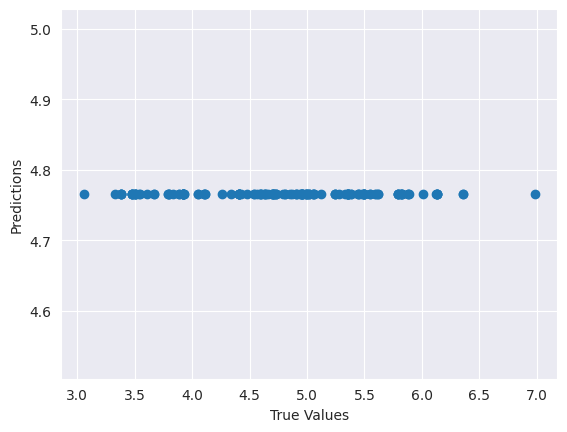

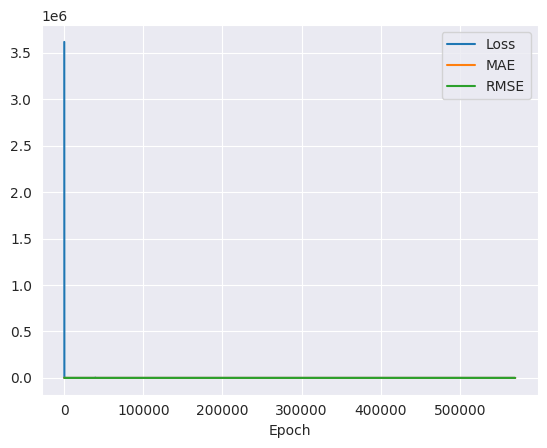

In [85]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Load the dataset
df = pd.read_csv('classicgeometry.csv')
X = torch.tensor(df.drop(['AverageMass', 'ID', 'Roundness'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df['AverageMass'].values, dtype=torch.float32)

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 300
batch_size = 32
num_batches = len(X_train) // batch_size
train_losses = []
train_mae = []
train_rmse = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i in range(num_batches):
        # Get a batch of data
        batch_X = X_train[i*batch_size:(i+1)*batch_size]
        batch_y = y_train[i*batch_size:(i+1)*batch_size]

        # Forward pass
        outputs = model(batch_X)
        y_pred = model(X)

        # Compute loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        train_losses.append(loss.item())
        train_mae.append(torch.abs(y_pred - y).mean().item())
        train_rmse.append(torch.sqrt(criterion(y_pred, y)).item())


    # Print epoch loss
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/num_batches:.4f}')
    
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test)
    print(f'Mean Squared Error on test set: {mse:.4f}')
    r2 = r2_score(y_test, predictions)
    print(f'R-squared value: {r2:.4f}')
    plt.scatter(y_test, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    #plt.show()

    # Plot the loss curve
    fig, ax = plt.subplots()
    ax.plot(train_losses, label='Loss')
    ax.plot(train_mae, label='MAE')
    ax.plot(train_rmse, label='RMSE')
    ax.set_xlabel('Epoch')
    ax.legend()
    plt.show()



In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Load the dataset
df = pd.read_csv('classicgeometry.csv')
X = torch.tensor(df.drop(['AverageMass', 'ID', 'Roundness'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df['AverageMass'].values, dtype=torch.float32)

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 4)
        self.fc2 = nn.Linear(4, 2)
        self.fc3 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
batch_size = 32
num_batches = len(X_train) // batch_size
train_losses = []
train_mae = []
train_rmse = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    if(epoch % 20 == 0):
        print(epoch)
    for i in range(num_batches):
        # Get a batch of data
        batch_X = X_train[i*batch_size:(i+1)*batch_size]
        batch_y = y_train[i*batch_size:(i+1)*batch_size]

        # Forward pass
        outputs = model(batch_X)
        y_pred = model(X)

        # Compute loss
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        train_losses.append(loss.item())
        train_mae.append(torch.abs(y_pred - y).mean().item())
        train_rmse.append(torch.sqrt(criterion(y_pred, y)).item())


    # Print epoch loss
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/num_batches:.4f}')
    
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test)
    print(f'Mean Squared Error on test set: {mse:.4f}')
    r2 = r2_score(y_test, predictions)
    print(f'R-squared value: {r2:.4f}')
    plt.scatter(y_test, predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    #plt.show()

    # Plot the loss curve
    fig, ax = plt.subplots()
    ax.plot(train_losses, label='Loss')
    ax.plot(train_mae, label='MAE')
    ax.plot(train_rmse, label='RMSE')
    ax.set_xlabel('Epoch')
    ax.legend()
    plt.show()



0


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([774])) that is different to the input size (torch.Size([774, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential

df = pd.read_csv('humoments.csv')
X = df.drop(['AverageMass', 'ID'], axis=1).values
y = df['AverageMass'].values

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)
# Load wights file of the best model :
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
15/20 [=====================>.......

FileNotFoundError: ignored

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([774])) that is different to the input size (torch.Size([774, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RMSE: 1.0125, MAE: 1.0125


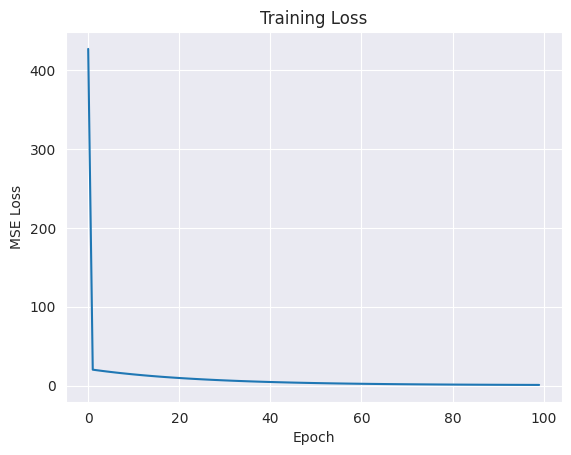

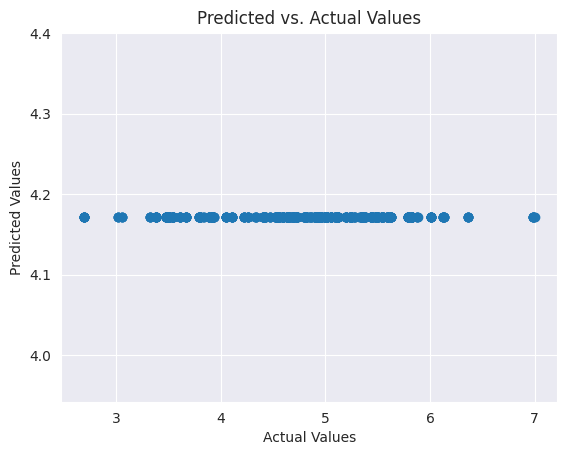

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('classicgeometry.csv')
x = torch.tensor(df.drop(['AverageMass', 'ID'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df['AverageMass'].values, dtype=torch.float32)

# Define the model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = NeuralNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, torch.FloatTensor(y))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Evaluate the model
y_pred = model(x)
rmse = torch.sqrt(criterion(y_pred, y)).item()
mae = torch.sqrt(criterion(y_pred, y)).item()
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Plot the loss over epochs
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Plot the predicted vs. actual values
#plt.scatter(y, y_pred.detach().numpy())
plt.scatter(y.detach().numpy(), y_pred.detach().numpy().flatten())
#print("orig values",y.detach().numpy())
#print("predicted",y_pred.detach().numpy().flatten())
plt.title("Predicted vs. Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([774])) that is different to the input size (torch.Size([774, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RMSE: 13.7548, MAE: 13.7548, R-squared: -286.0646


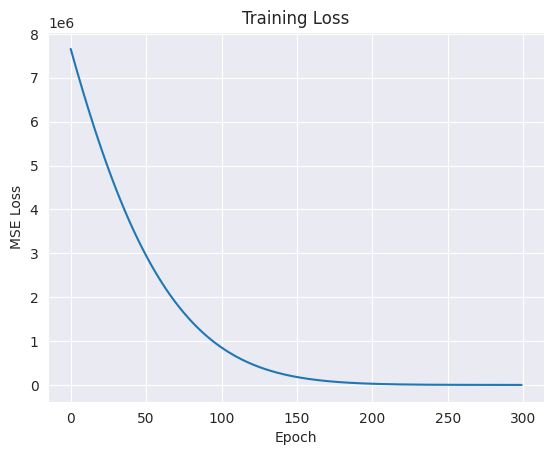

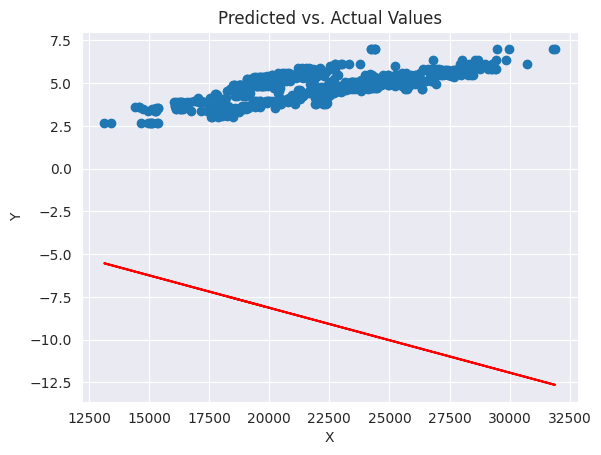

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('classicgeometry.csv')
x = torch.tensor(df.drop(['AverageMass', 'ID', 'Roundness'], axis=1).values, dtype=torch.float32)
y = torch.tensor(df['AverageMass'].values, dtype=torch.float32)

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        return x

model = LinearRegression()

# Define loss function and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
losses = []
for epoch in range(300):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Evaluate the model
y_pred = model(x)
rmse = torch.sqrt(criterion(y_pred, y)).item()
mae = torch.sqrt(criterion(y_pred, y)).item()
r2 = r2_score(y, y_pred.detach().numpy())
print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}")


# Plot the loss over epochs
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Plot the predicted vs. actual values
plt.scatter(x, y)
plt.plot(x, y_pred.detach().numpy(), color="red")
plt.title("Predicted vs. Actual Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
data = pd.read_csv('classicgeometry.csv')
data = pd.read_csv('allfeaturesRaspberriesRaw.csv')

data.drop(['AverageMass', 'ID'], axis=1).describe()



AreaInSquaredPixels   Roundness         hu0         hu1         hu2  \
count           774.000000  774.000000  774.000000  774.000000  774.000000   
mean          22001.943798    0.907740    2.694706    7.063694    9.618239   
std            3486.847928    0.045102    0.044423    0.525085    0.756264   
min           13131.500000    0.773100    2.572492    6.154061    8.516990   
25%           19300.250000    0.875000    2.664985    6.725709    9.020942   
50%           21942.250000    0.904300    2.692026    6.992676    9.322092   
75%           24572.875000    0.953175    2.722398    7.293250   10.229001   
max           31892.000000    0.984800    2.869030   10.501714   12.521303   

              hu3         hu4         hu5         hu6       meanB       meanG  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean     9.618239    4.952692    4.163501    2.125774   37.928211   52.206351   
std      0.756264   20.843062   14.061635   21.300167    4.483216    6.894076   
min      8.516990  -26.506231  -16.867947  -25.948717   26.316043   35.301161   
25%      9.020942  -21.280601  -14.586645  -21.143339   34.739041   47.620941   
50%      9.322092   20.124297   13.866515   19.849925   37.548912   50.945300   
75%     10.229001   21.385661   14.604420   21.351134   40.906301   56.058267   
max     12.521303   26.307830   18.286482   26.113611   57.943849   87.200361   

            meanR  
count  774.000000  
mean   169.915389  
std     13.050616  
min    136.323438  
25%    161.366611  
50%    169.769803  
75%    177.502778  
max    222.815799

R-squared: 0.62


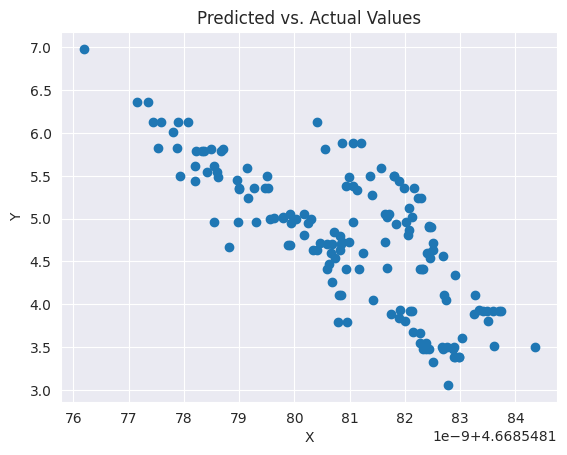

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('classicgeometry.csv')
X = df.drop(['AverageMass', 'ID', 'Roundness'], axis=1).values
y = df['AverageMass'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
r2 = svr.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')
X_new = scaler.transform(X_test)
y_pred = svr.predict(X_new)
#print(f'Predictions: {y_pred}')

plt.scatter(y_pred, y_test)
#plt.plot(x, y_pred, color="red")
plt.title("Predicted vs. Actual Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()




# FCNN (Fully Connected Neural Network)

In [ ]:
df = pd.read_csv("allfeaturesRaspberriesRaw.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

# FCNN
model = keras.Sequential(
    [
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
    ]
)

model.compile(loss="mean_squared_error", optimizer="adam")

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)


ValueError: ignored

In [ ]:
# Autoencoder

In [ ]:
df = pd.read_csv("humoments.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

# Autoencoder
input_layer = Input(shape=input_shape)
encoded = Dense(2, activation='relu')(input_layer)
encoded = Dense(3, activation='relu')(encoded)
decoded = Dense(2, activation='relu')(encoded)
decoded = Dense(5, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)

# Define the encoder model
encoder = Model(input_layer, encoded)

# Compile the model
encoder.compile(loss="mean_squared_error", optimizer="adam")

log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
encoder.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)


16/16 [==============================] - 1s 11ms/step - loss: 85.2560 - val_loss: 93.3539


InvalidArgumentError: ignored

# MLP (Multilayer Perceptron)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 135.4430 - mae: 9.7760 - val_loss: 19.6906 - val_mae: 4.2164
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 14.2029 - mae: 3.2794 - val_loss: 2.1565 - val_mae: 1.1943
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 4.7719 - mae: 1.7604 - val_loss: 3.1651 - val_mae: 1.4392
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 2.9620 - mae: 1.3832 - val_loss: 2.4879 - val_mae: 1.2850
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 2.0621 - mae: 1.1678 - val_loss: 1.8046 - val_mae: 1.0858
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 1.7487 - mae: 1.0682 - val_loss: 1.5284 - val_mae: 0.9974
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 1.5833 - mae: 1.0144 - val_loss: 1.5334 - val_mae: 1.0012
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 1.511

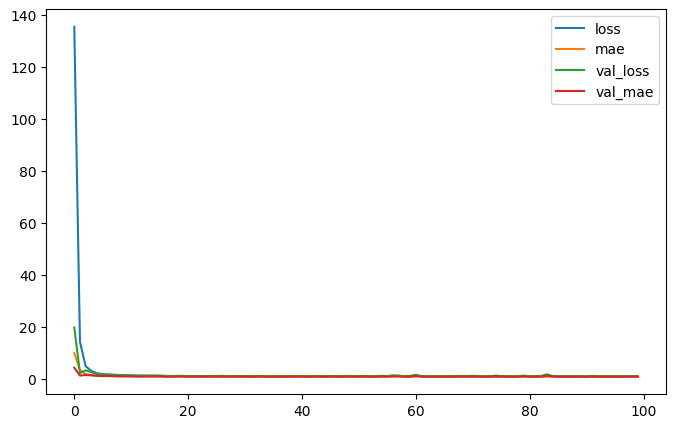

Test loss: [0.7925786375999451, 0.712090253829956]
5/5 [==============================] - 0s 3ms/step
R^2 score: -0.3404131993882029


In [ ]:
df = pd.read_csv("colors.csv")

X = df.drop(columns=['AverageMass', 'ID'])
y = df['AverageMass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the input shape and number of classes
input_shape = (X_train.shape[1],)
num_classes = 1

inputs = Input(shape=input_shape)


model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))



#self.model.compile( loss = "categorical_crossentropy", optimizer = sgd, metrics=['accuracy'])
# Compile the model

opt = optimizers.Adam(learning_rate=0.01)

#model.compile(loss="mean_squared_error", optimizer=opt, metrics = [metrics.mae, metrics.categorical_accuracy])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
log_dir = "logs/fit/"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
HISTORY = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

pd.DataFrame(HISTORY.history).plot(figsize=(8,5))
plt.show()
print("Test loss:", test_loss)
# calculate the mean absolute error (MAE)
#mae = np.mean(np.abs(y_test - model.predict(X_test)))

# calculate the mean squared error (MSE)
#mse = np.mean((y_test - model.predict(X_test))**2)
y_pred = model.predict(X_test)
#print(y_test)
#print(y_pred)
r2 = r2_score(y_test, y_pred)
print('R^2 score:', r2)

# print the MAE and MSE
#print("Mean Absolute Error (MAE): {:.2f}".format(mae))
#print("Mean Squared Error (MSE): {:.2f}".format(mse))


In [ ]:
print(X_test)
print(type(X_test))
y_pred = model.predict(X_test)




print(y_pred[:10])


     AreaInSquaredPixels  Roundness
308              22598.0     0.9058
287              25697.5     0.8700
684              18380.0     0.9466
403              22168.0     0.9034
327              19113.0     0.9624
..                   ...        ...
678              21386.5     0.9594
292              19296.5     0.9706
445              19195.5     0.9806
258              20749.0     0.9439
497              20009.0     0.9492

[155 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
5/5 [==============================] - 0s 2ms/step
[[25.665035]
 [29.15298 ]
 [20.918118]
 [25.180538]
 [21.744656]
 [28.676846]
 [21.664486]
 [30.834896]
 [26.62817 ]
 [23.526974]]
